# Lab | Cleaning numerical data
## 1. Import the necessary libraries.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
# reading teh data using the pandas library and showing the first 5 rows
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First look at its main features (head, shape, info).

In [3]:
# show the first 5 rows of teh dataset
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#print the shape of the dataset
print(customer_df.shape)

(9134, 24)


In [5]:
#  method in pandas provides a concise summary of the data frame's information, including the number of columns, their data types, the number of non-null values, and memory usage.
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   float64
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

## 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)


In [6]:
# get the list of columns
cols = customer_df.columns

# rename the columns to snake case
new_cols = [col.lower().replace(" ", "_") for col in cols]
customer_df.columns = new_cols

# check the new column names
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## 5. Change effective to date column to datetime format.


In [7]:
# Change "effective_to_date" column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# check the new type of the column
customer_df['effective_to_date'].dtypes

dtype('<M8[ns]')

### 6. Define a function that differentiates between continuous and discrete variables.
Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

We think that float data type more suitable for column income instead of integer. So, we converted it.

In [8]:
# Function to differentiate between continuous and discrete variables
def differentiate_vars(df):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    
    for col in df.columns:
        if df[col].nunique() > 20:
            continuous_df[col] = df[col]
        else:
            discrete_df[col] = df[col]
    return continuous_df, discrete_df

# Separate continuous and discrete variables
continuous_df, discrete_df = differentiate_vars(customer_df)

# Convert "income" column to float
customer_df['income'] = customer_df['income'].astype(float)

In [9]:
discrete_df.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
continuous_df.head()

,customer,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,BU79786,2763.519279,2011-02-24,56274.0,69,32,5,384.811147
1,QZ44356,6979.535903,2011-01-31,0.0,94,13,42,1131.464935
2,AI49188,12887.431650,2011-02-19,48767.0,108,18,38,566.472247
3,WW63253,7645.861827,2011-01-20,0.0,106,18,65,529.881344
4,HB64268,2813.692575,2011-02-03,43836.0,73,12,44,138.130879


In [11]:
continuous_df = continuous_df.drop(['customer'], axis=1)

## 7. Plot a correlation matrix, comment what you see.

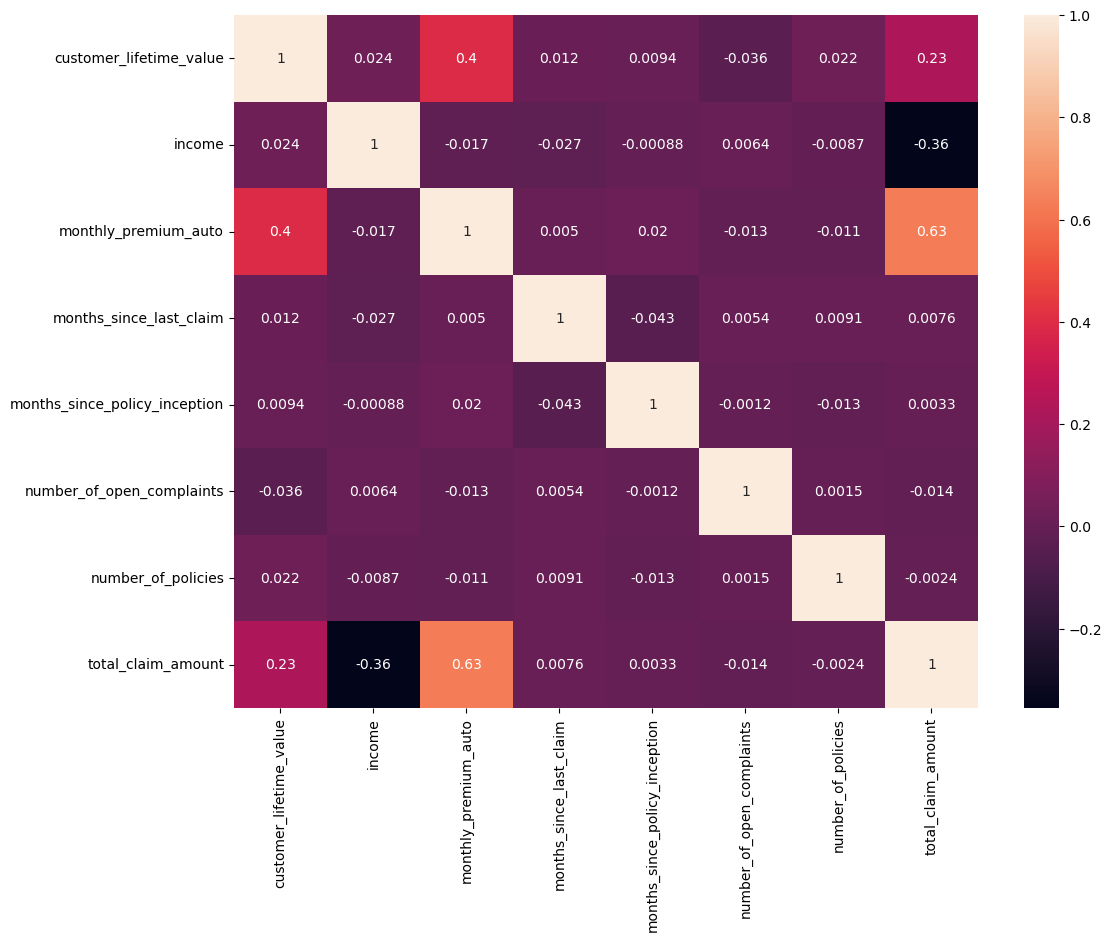

In [12]:
plt.figure(figsize=(12, 9))
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### We don't see multicollinearity. We don't need to remove columns.

### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)
Discrete variable

In [13]:
def plot_discrete_variables(df, columns):
    """
    This function takes in a dataframe and a list of columns containing the discrete variables.
    It plots a histogram for each discrete variable in the list.
    """
    for col in columns:
        sns.countplot(x=col, data=df)
        plt.title(f'Frequency distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

def plot_continuous_variables(df, columns):
    """
    This function takes in a dataframe and a list of columns containing the continuous variables.
    It plots a box plot for each continuous variable in the list.
    """
    for col in columns:
        sns.histplot(x=col, data=df)
        plt.title(f'Box plot of {col}')
        plt.xlabel(col)
        plt.show()

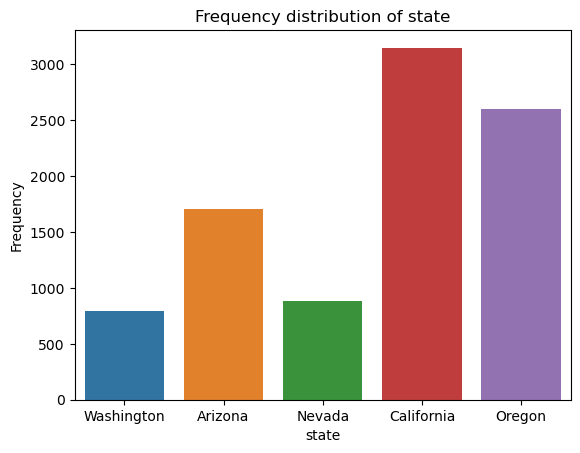

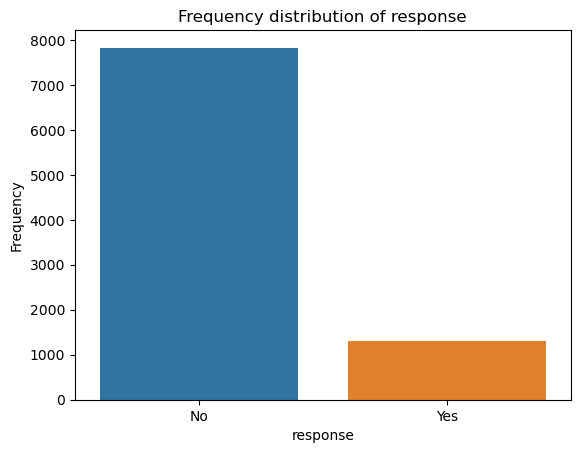

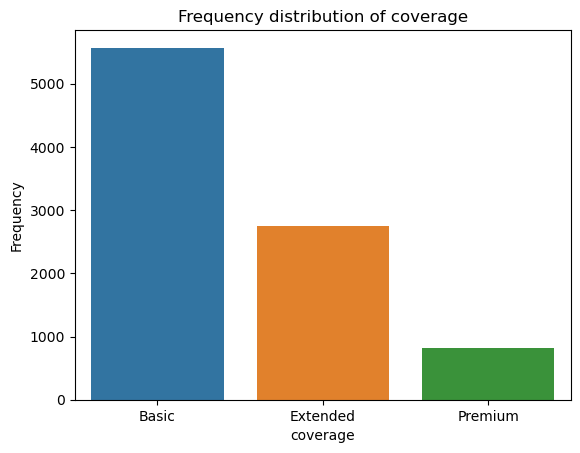

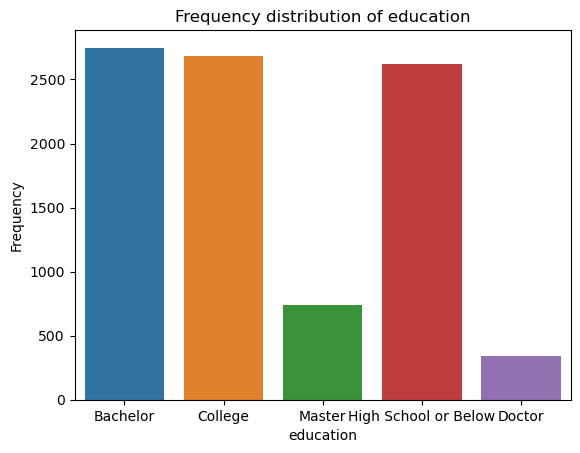

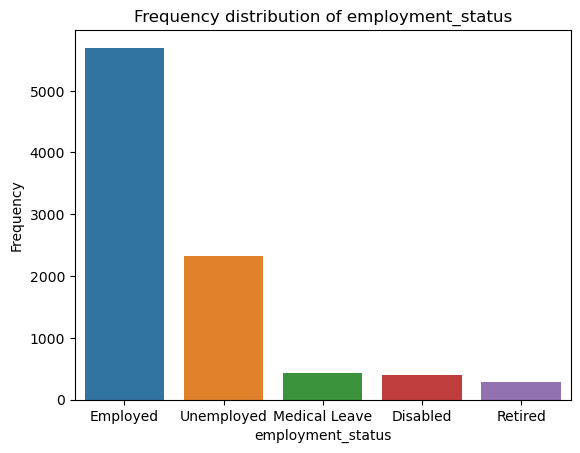

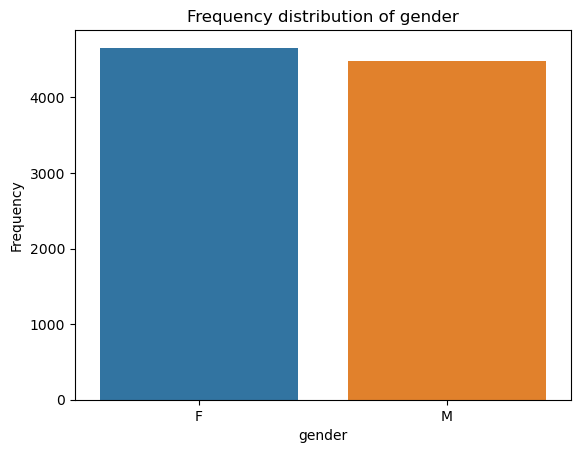

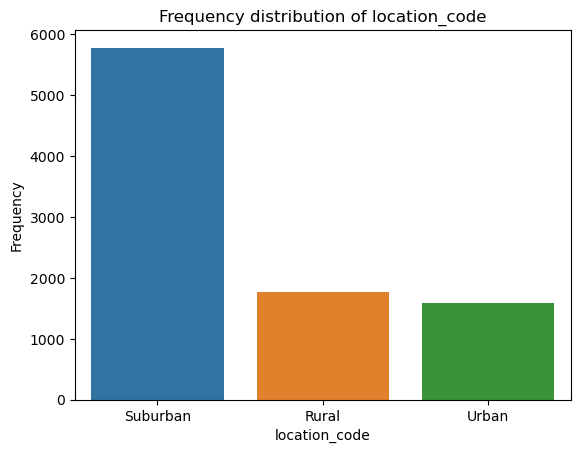

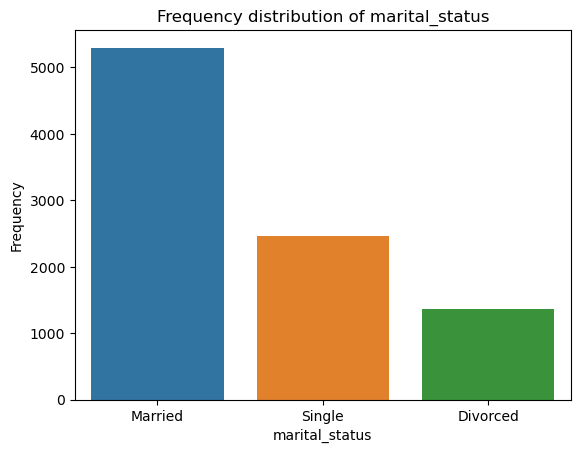

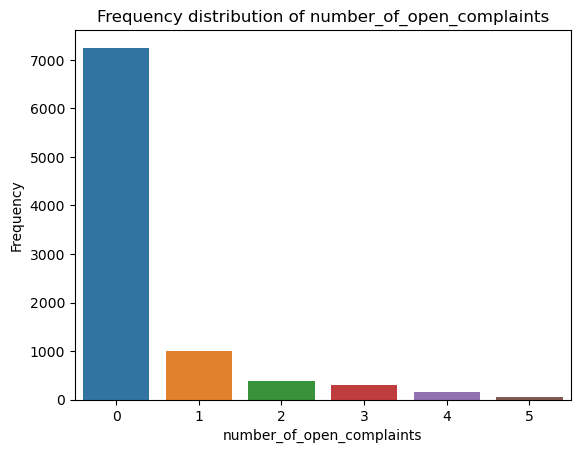

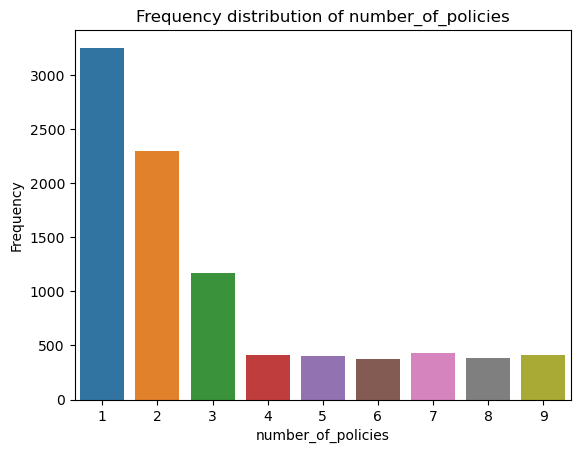

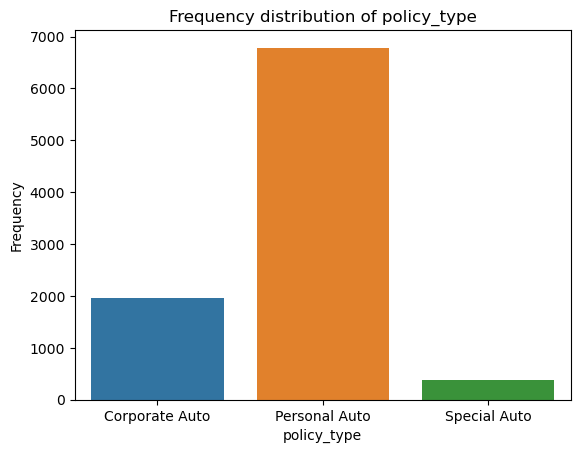

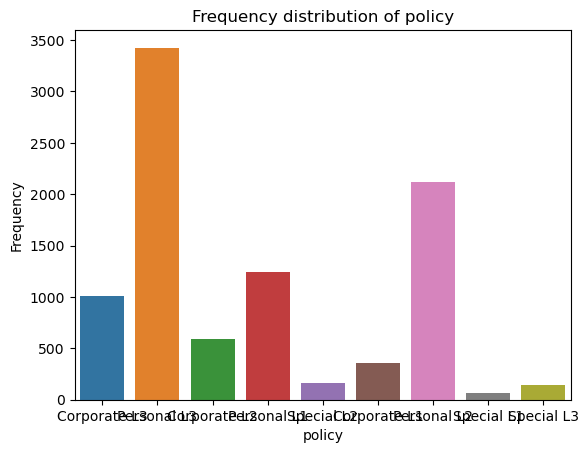

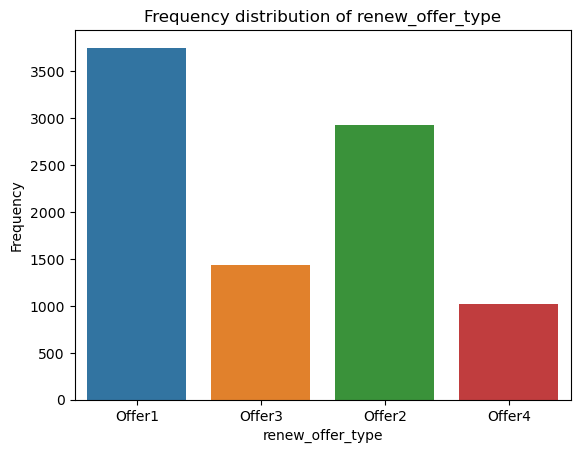

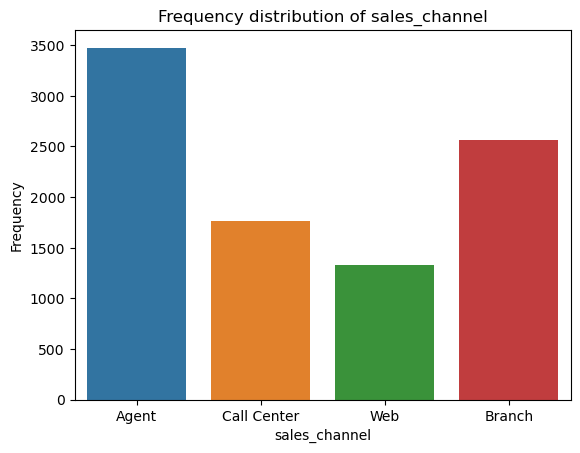

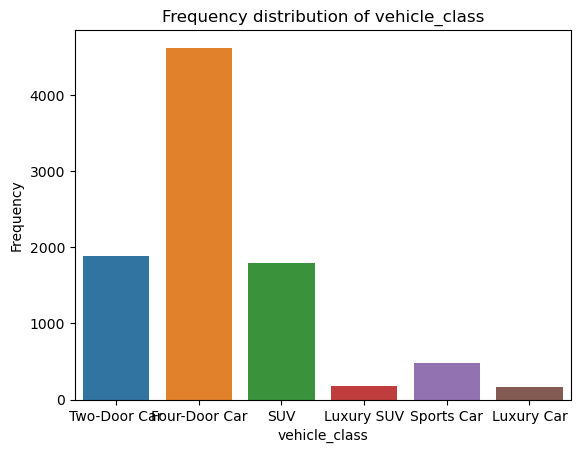

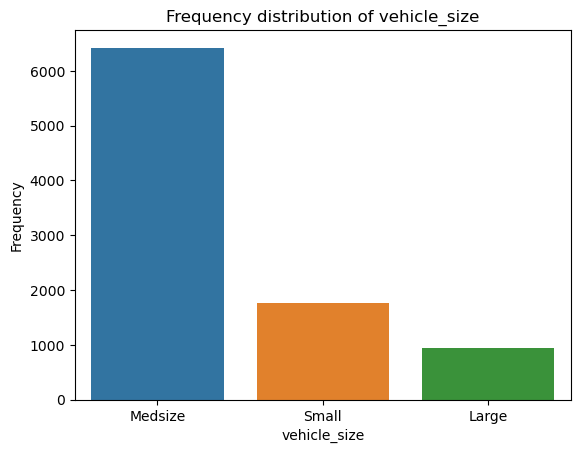

In [14]:
# Plot discrete variables
plot_discrete_variables(customer_df, discrete_df)

### Continuous variables

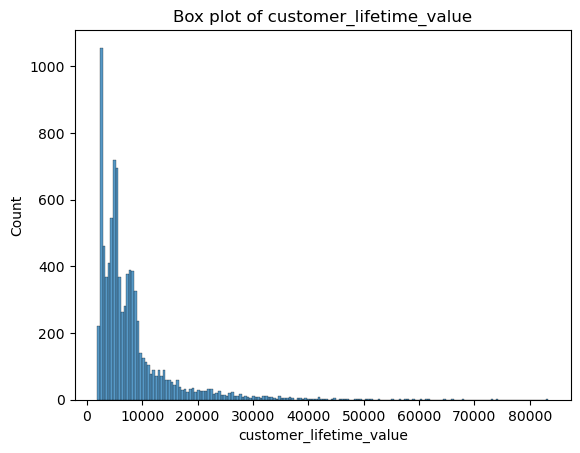

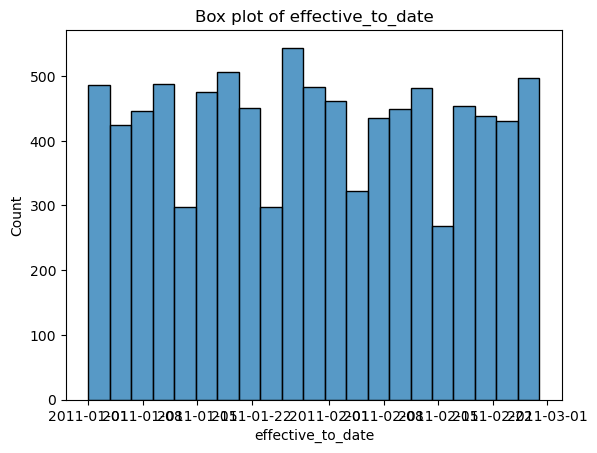

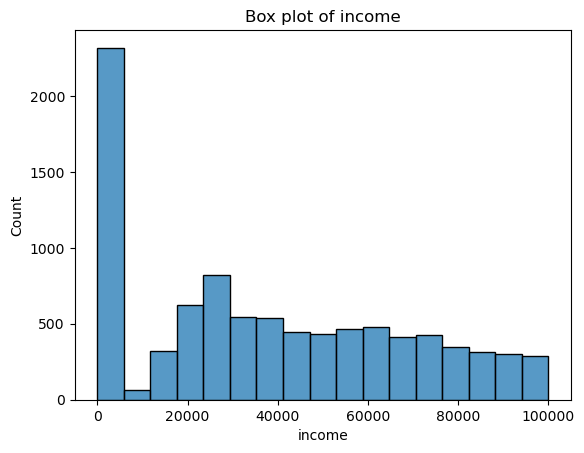

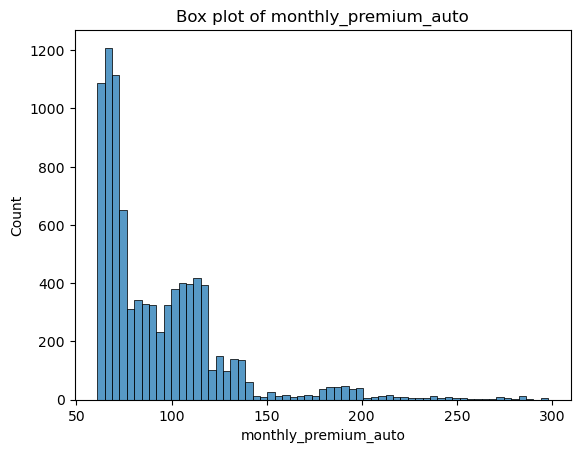

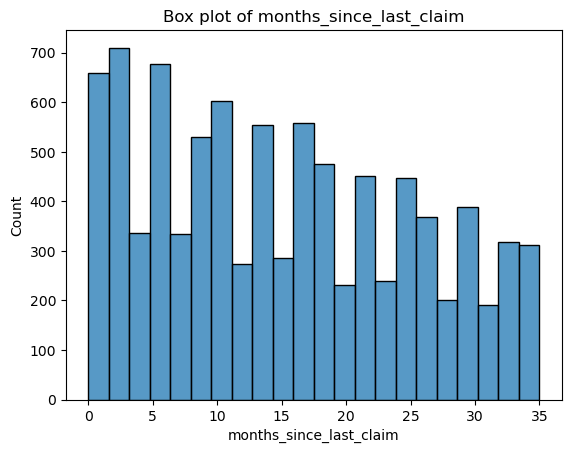

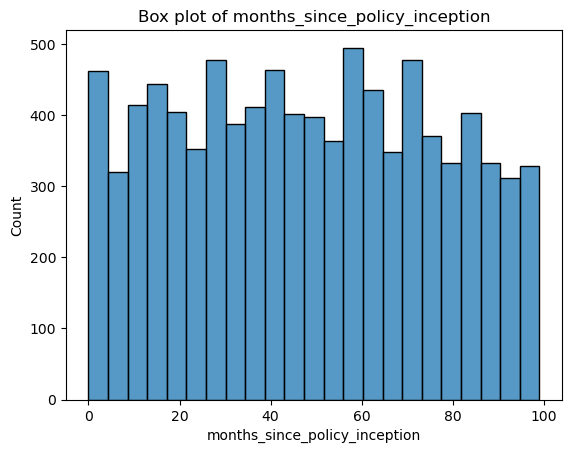

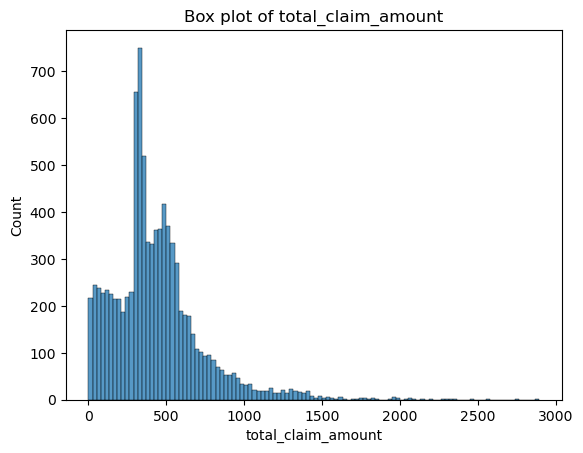

In [15]:
# Plot continuous variables
plot_continuous_variables(customer_df, continuous_df)

### 9 .Comment what you can see in the plots.
We have outliers in continuous columns customer_lifetime_value, monthly_premium_auto and total_claim_amount.

### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
Good type of plot for this it's boxplot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


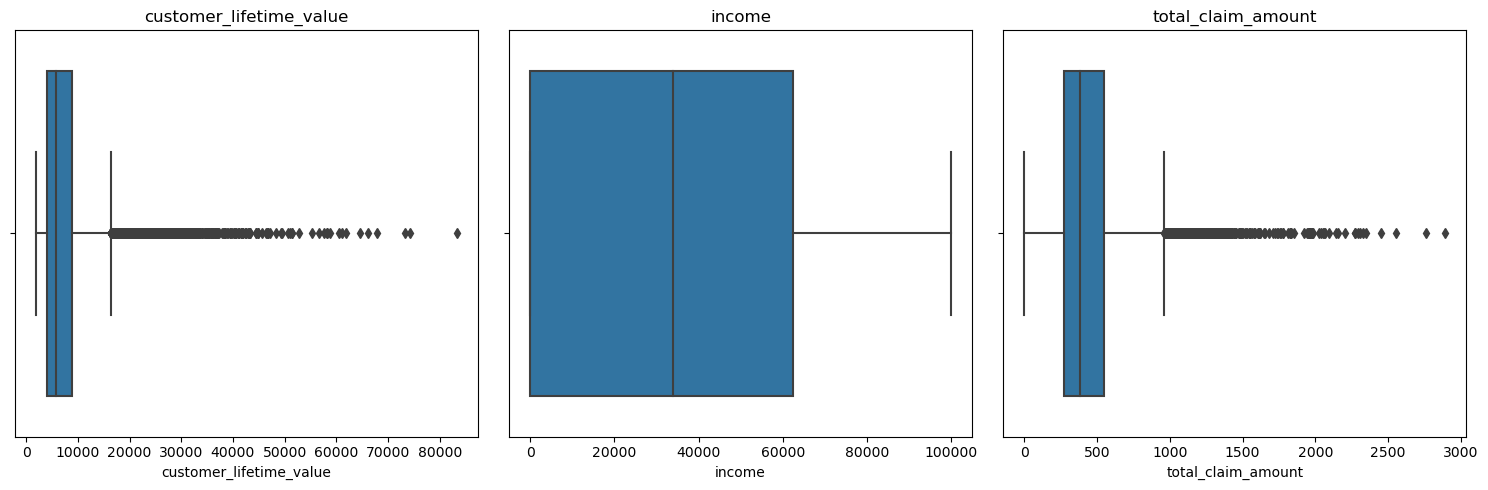

In [16]:
def plot_outliers(df):
    # Create a subplot for each continuous variable
    n_cols = len(df.select_dtypes(include=['float']).columns)
    fig, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(15, 5))

    # Plot boxplot for each continuous variable
    for i, col in enumerate(df.select_dtypes(include=['float']).columns):
        sns.boxplot(df[col], ax=ax[i])
        ax[i].set_title(col)

    plt.tight_layout()
    plt.show()
    
# Call the function
plot_outliers(continuous_df)

### 11 . Did you find outliers? Comment what you will do with them.
Yes, we have outliers. And depends on our goal and data in columns we are goung to use different methods to remove it. Right now I dicaded do nothing with outliers.
To handle outliers, one can remove the data points that are significantly outside the range of the other data points,

### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [17]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [18]:
customer_df.to_csv('files_for_lab/1step_we_fn_use_c_marketing_customer_value_analysis.csv', index=False)


# Lab | Cleaning categorical data

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

customer_df = pd.read_csv('files_for_lab/1step_we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


## 2. Find all of the categorical data. Save it in a categorical_df variable.


In [20]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [21]:
def get_categorical_df(df):
    categorical_df = df.select_dtypes(include=['object', 'category'])
    return categorical_df

# Example usage
categorical_df = get_categorical_df(customer_df)
categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 3. Check for NaN values.

In [22]:
# check for Nan values in every column
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## 4. Check all unique values of columns.

In [23]:
for column in categorical_df.columns:
    print(f"{column} unique values: {categorical_df[column].nunique()}")

state unique values: 5
response unique values: 2
coverage unique values: 3
education unique values: 5
employment_status unique values: 5
gender unique values: 2
location_code unique values: 3
marital_status unique values: 3
policy_type unique values: 3
policy unique values: 9
renew_offer_type unique values: 4
sales_channel unique values: 4
vehicle_class unique values: 6
vehicle_size unique values: 3


## 5. Check dtypes. Do they all make sense as categorical data?

In [24]:
categorical_df.dtypes

state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [25]:
categorical_df.head(3)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


## 6. Does any column contain alpha and numeric data? Decide how to clean it.

In [26]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [27]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [28]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

### Answers:
We have 3 columns with included alpha and numeric data: customer, policy and renew_offer_type.

customer I will delete it later.
policy I remove it because this column contains the same information as the policy_type column.
renew_offer_type I decided not to do anything with this column, because it simply describes the type of offer, and it doesn't really matter what it's called.

## 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.
Answers:
For this step I don't see that we have to do anything else with categorical data. Only combined some subcategories in columns.

## 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [29]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [30]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [31]:
categorical_df = categorical_df.drop('policy',axis = 1)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              9134 non-null   object
 1   response           9134 non-null   object
 2   coverage           9134 non-null   object
 3   education          9134 non-null   object
 4   employment_status  9134 non-null   object
 5   gender             9134 non-null   object
 6   location_code      9134 non-null   object
 7   marital_status     9134 non-null   object
 8   policy_type        9134 non-null   object
 9   renew_offer_type   9134 non-null   object
 10  sales_channel      9134 non-null   object
 11  vehicle_class      9134 non-null   object
 12  vehicle_size       9134 non-null   object
dtypes: object(13)
memory usage: 927.8+ KB


### As I noted above, we don't need both of these columns. Because they contained the same information, only the policy column contained more detailed information. Of these two, I decided to remove the policy column.

# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.
Column employment_status
Combine the values: Medical Leave, Disabled and Retired with Unemployed value. Because these values have the same meaning.

Column education
Combine the values: Master and Doctor in a new sub-category High-level-degree.

Column vehicle_class
Create a new sub-category Luxury-Sport that will include the old values: Sports Car, Luxury SUV, Luxury Car.

In [32]:
# Combining similar values in employment_status column
customer_df['employment_status'] = customer_df['employment_status'].replace(['Medical Leave', 'Disabled', 'Retired'], 'Unemployed')

# Combining Master and Doctor into High-level-degree in education column
customer_df['education'] = customer_df['education'].replace(['Master', 'Doctor'], 'High-level-degree')

# Creating a new sub-category Luxury-Sport for vehicle_class column
customer_df['vehicle_class'] = customer_df['vehicle_class'].replace(['Sports Car', 'Luxury SUV', 'Luxury Car'], 'Luxury-Sport')

## Save new data

In [33]:

customer_df.to_csv('files_for_lab/2step_we_fn_use_c_marketing_customer_value_analysis.csv', index=False)

# Lab 4.03 | FEATURE extraction

In [34]:
customer_df = pd.read_csv('files_for_lab/2step_we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [35]:
categoricals = customer_df.select_dtypes(np.object)
categoricals = categoricals.drop(['customer'], axis=1)
categoricals.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19848\1057257457.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2.Plot all the categorical variables with the proper plot. What can you see?

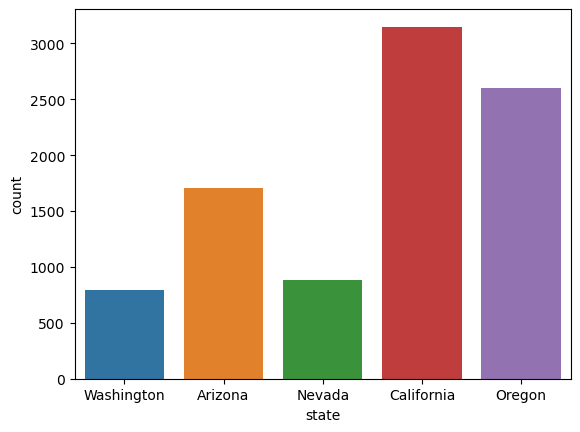

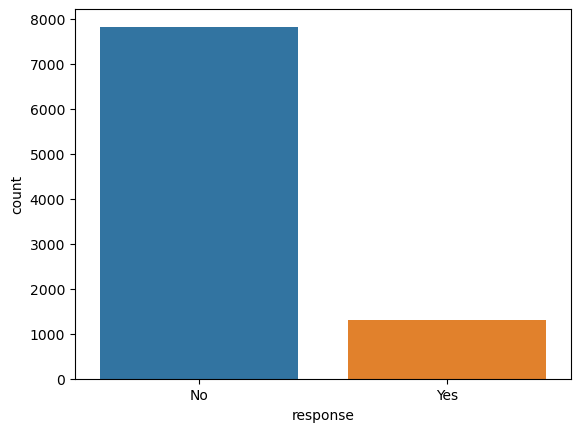

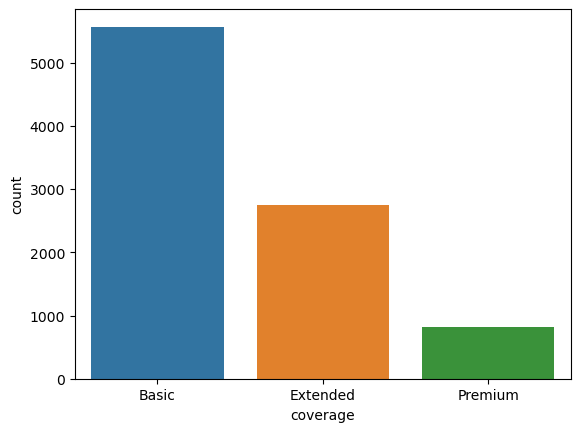

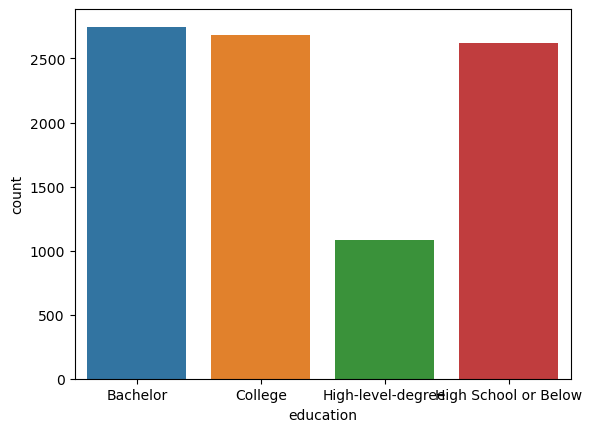

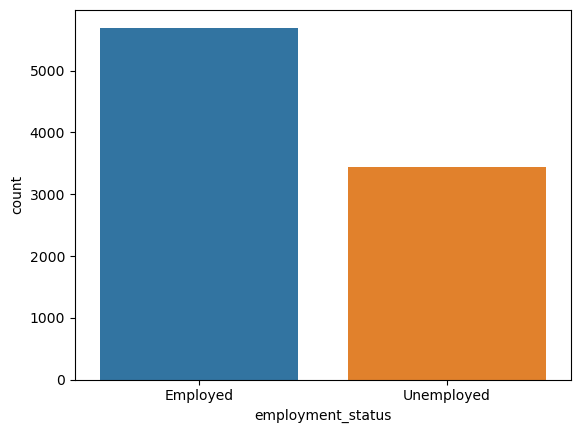

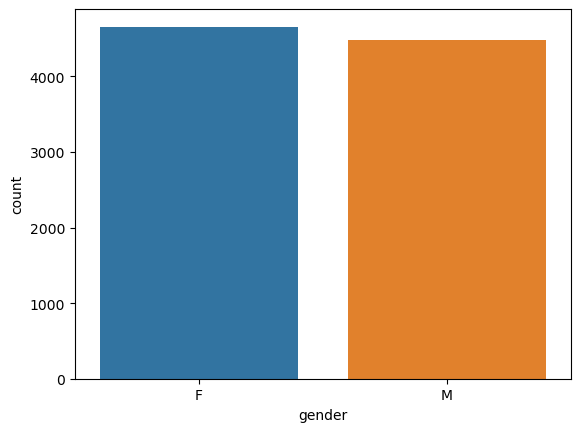

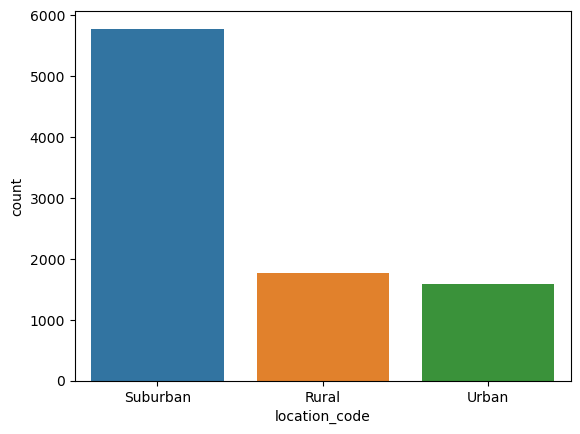

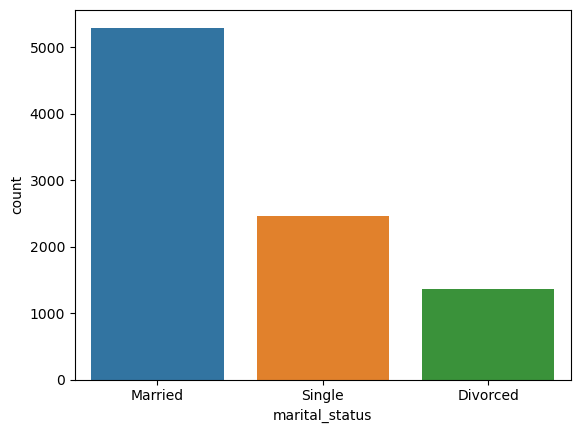

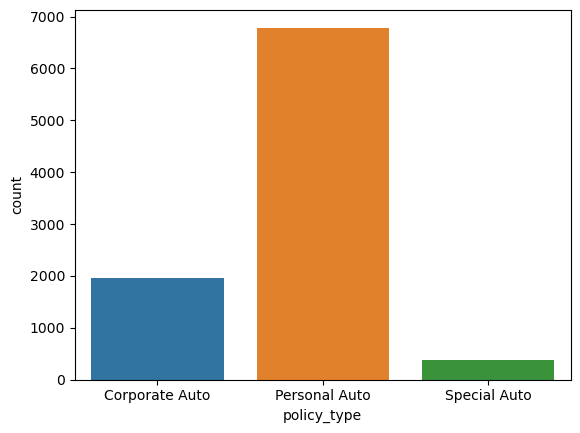

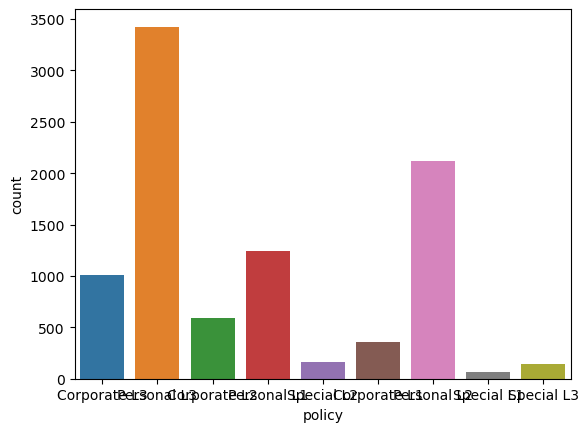

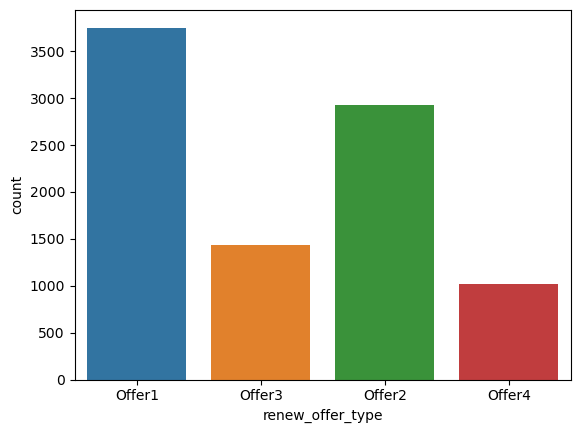

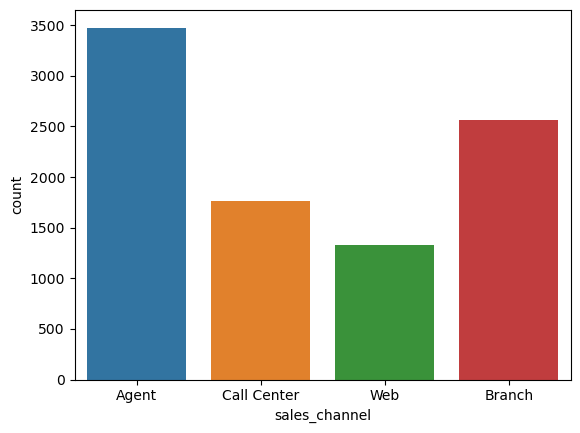

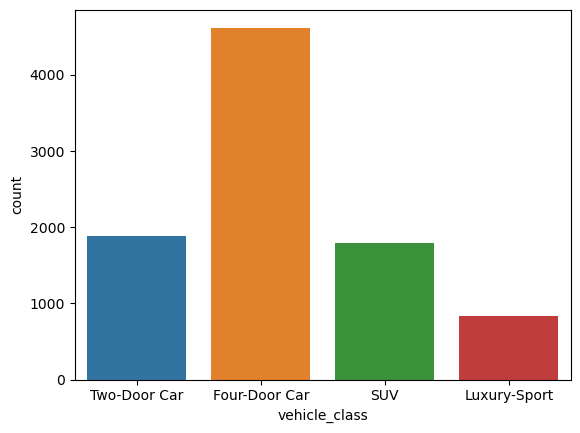

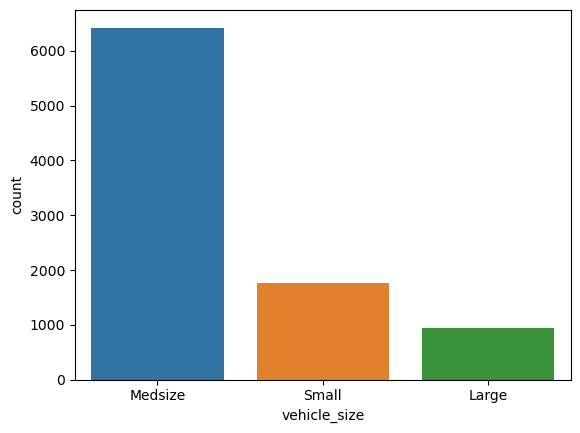

In [36]:
import seaborn as sns

for col in categoricals.columns :
    sns.countplot(x=col, data=categoricals)
    plt.show()

### 3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


.We find redundancy between 'Policy' and 'Policy_type'.

.We have already deal with this previously ( we only keep the policy_type column in our categorical data frame)

### .Plot time variable. Can you extract something from it?

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

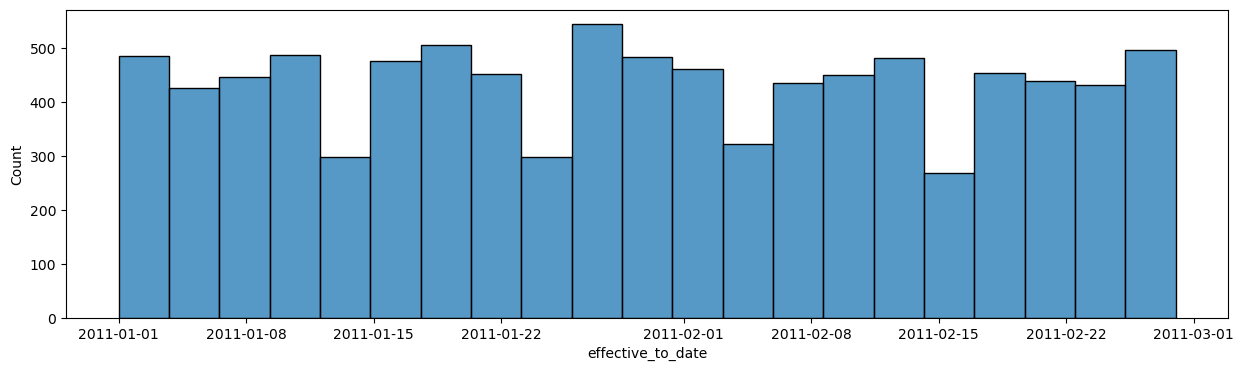

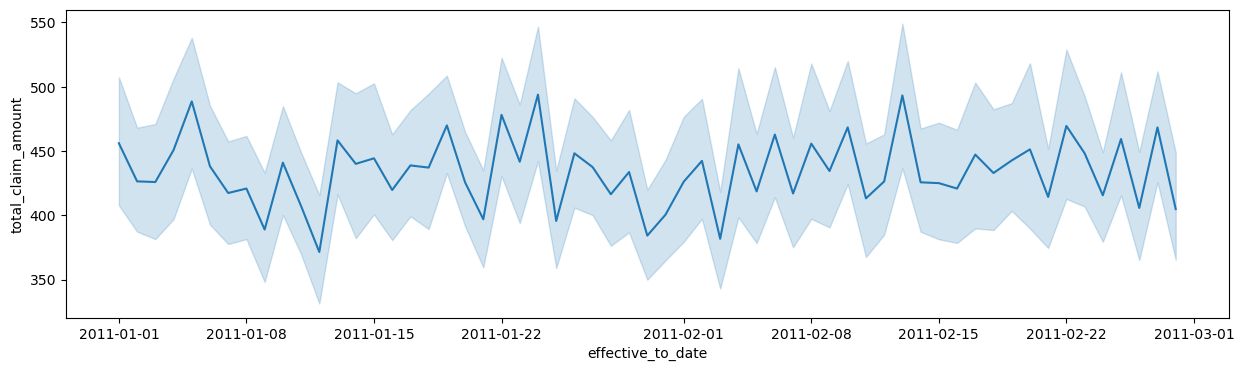

In [37]:
# Plotting histogram and lineplot of the effective_to_date column
plt.figure(figsize=(15,4))
sns.histplot(data=customer_df, x="effective_to_date")

plt.figure(figsize=(15,4))
sns.lineplot(data=customer_df, x="effective_to_date", y='total_claim_amount',markers=True)


In [38]:
# Function to extract year, month and day of the week from effective_to_date
def extract_date_info(df, date_col):
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['day_week'] = df[date_col].dt.day
    return df

# Converting effective_to_date column to datetime and extracting year, month and day of the week
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df = extract_date_info(customer_df, 'effective_to_date')

# Displaying first 3 rows of the updated dataframe
customer_df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,day_week
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19


In [39]:
customer_df.to_csv('files_for_lab/3step_we_fn_use_c_marketing_customer_value_analysis.csv', index=False)

# Lab | Comparing regression models
### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [40]:
# import the train test split function to help us
from sklearn.model_selection import train_test_split

In [41]:
customer_df = pd.read_csv('files_for_lab/3step_we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,day_week
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19


In [42]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

## 2. We will start with removing outliers, if you have not already done so.

In [43]:
customer_df.shape

(9134, 27)

In [44]:
from scipy import stats

z_threshold = 3

# Calculate the z-scores of the continuous variables
z_scores = np.abs(stats.zscore(customer_df.select_dtypes(include=['float64'])))

# Keep only the rows that have all z-scores less than the threshold
customer_df = customer_df[(z_scores < z_threshold).all(axis=1)]

In [45]:
customer_df.shape

(8780, 27)

### 3. Create a copy of the dataframe for the data wrangling.

In [46]:
# Create a copy of the dataframe for data wrangling
wrangled_df = customer_df.copy()

#we don't need this column for next steps
wrangled_df = wrangled_df.drop(['customer'],axis=1)
wrangled_df['months_since_policy_inception'] = wrangled_df['months_since_policy_inception'].astype(float)

In [47]:
wrangled_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'year', 'month', 'day_week'],
      dtype='object')

### 4. Normalize the continuous variables. You can use any one method you want.

In [48]:
#Perform scaling on the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_vars = ['income', 'customer_lifetime_value', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']
wrangled_df[continuous_vars] = scaler.fit_transform(wrangled_df[continuous_vars])
wrangled_df[continuous_vars]

,income,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,0.601885,-0.901091,-0.715328,1.684722,-1.538617,-0.103588
1,-1.250520,-0.049037,0.119545,-0.205522,-0.211358,2.984981
2,0.354772,1.144946,0.587074,0.291910,-0.354845,0.647862
3,-1.250520,0.085628,0.520284,0.291910,0.613695,0.496502
4,0.192456,-0.890951,-0.581749,-0.305009,-0.139614,-1.123993
...,...,...,...,...,...,...
9129,1.117605,3.270740,-0.581749,0.291910,1.474620,-0.875370
9130,-0.539368,-0.833794,-0.381379,-0.106036,-0.713564,-0.126799
9131,-1.250520,0.190321,-0.181010,-0.603469,-0.390717,1.575742
9132,-0.528275,0.061089,0.186335,1.883695,-1.610361,1.163804


## 5. Encode the categorical variables

In [49]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [50]:
#Encode the categorical variables
wrangled_df = pd.get_dummies(wrangled_df, columns=['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'])

In [51]:
wrangled_df

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,total_claim_amount,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury-Sport,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,-0.901091,2011-02-24,0.601885,-0.715328,1.684722,-1.538617,0,1,Corporate L3,-0.103588,...,0,0,0,0,0,0,1,0,1,0
1,-0.049037,2011-01-31,-1.250520,0.119545,-0.205522,-0.211358,0,8,Personal L3,2.984981,...,0,0,0,1,0,0,0,0,1,0
2,1.144946,2011-02-19,0.354772,0.587074,0.291910,-0.354845,0,2,Personal L3,0.647862,...,0,0,0,0,0,0,1,0,1,0
3,0.085628,2011-01-20,-1.250520,0.520284,0.291910,0.613695,0,7,Corporate L2,0.496502,...,0,1,0,0,0,1,0,0,1,0
4,-0.890951,2011-02-03,0.192456,-0.581749,-0.305009,-0.139614,0,1,Personal L1,-1.123993,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3.270740,2011-02-10,1.117605,-0.581749,0.291910,1.474620,0,2,Personal L1,-0.875370,...,0,0,1,1,0,0,0,0,1,0
9130,-0.833794,2011-02-12,-0.539368,-0.381379,-0.106036,-0.713564,0,1,Corporate L3,-0.126799,...,1,0,0,1,0,0,0,0,1,0
9131,0.190321,2011-02-06,-1.250520,-0.181010,-0.603469,-0.390717,3,2,Corporate L2,1.575742,...,1,0,0,1,0,0,0,0,1,0
9132,0.061089,2011-02-03,-0.528275,0.186335,1.883695,-1.610361,0,3,Personal L2,1.163804,...,1,0,0,1,0,0,0,1,0,0


## 6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
I've done it already.

### 7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [52]:
# check data types
print(wrangled_df.dtypes)

# convert non-numerical columns to numerical data using one-hot encoding
wrangled_df = wrangled_df.astype(float, errors='ignore')

# check data types again
print(wrangled_df.dtypes)

customer_lifetime_value                  float64
effective_to_date                 datetime64[ns]
income                                   float64
monthly_premium_auto                     float64
months_since_last_claim                  float64
months_since_policy_inception            float64
number_of_open_complaints                  int64
number_of_policies                         int64
policy                                    object
total_claim_amount                       float64
year                                       int64
month                                      int64
day_week                                   int64
state_Arizona                              uint8
state_California                           uint8
state_Nevada                               uint8
state_Oregon                               uint8
state_Washington                           uint8
response_No                                uint8
response_Yes                               uint8
coverage_Basic      

### 8. Try a simple linear regression with all the data to see whether we are getting good results.


In [53]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

wrangled_df = wrangled_df.drop(['effective_to_date', 'policy'], axis=1)

# Define X and y
X = wrangled_df.drop("total_claim_amount", axis=1)
y = wrangled_df["total_claim_amount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


Mean Squared Error:  0.22127674184417176


# 9. 10. 11.
Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
Use the function to check LinearRegressor and KNeighborsRegressor.
You can check also the MLPRegressor for this task! https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def train_models(model_list, X_train, y_train, X_test, y_test):
    for model in model_list:
        model.fit(X_train, y_train)
        print(model," score on training data: ", model.score(X_train, y_train))
        print(model," score on testing data: ", model.score(X_test, y_test))
        print("\n")
    return None
X = wrangled_df.drop('total_claim_amount', axis=1)
y = wrangled_df['total_claim_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

model_list = [LinearRegression(), KNeighborsRegressor()]
train_models(model_list, X_train, y_train, X_test, y_test)


LinearRegression()  score on training data:  0.7727146855632245
LinearRegression()  score on testing data:  0.7624864687682578


KNeighborsRegressor()  score on training data:  0.8065648153249906
KNeighborsRegressor()  score on testing data:  0.697721616424405


